# Proyek Analisis Data: E-Commerce Public Dataset 
- **Nama:** Muhammad Habiburrahman
- **Email:** lavendermhd@gmail.com
- **ID Dicoding:** mhabbatein

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi frekuensi pesanan berdasarkan status pesanan (order_status)?
- Bagaimana rata-rata waktu yang dibutuhkan dari pembelian hingga pengiriman ke pelanggan (dari order_purchase_timestamp hingga order_delivered_customer_date)?

## Import Semua Packages/Library yang Digunakan

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [61]:
customers_df = pd.read_csv("./data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [62]:
geolocation_df = pd.read_csv("./data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [63]:
order_items_df = pd.read_csv("./data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [64]:
order_payments_df = pd.read_csv("./data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [65]:
order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [66]:
orders_df = pd.read_csv("./data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [67]:
product_category_name_translation_df = pd.read_csv("./data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [68]:
products_df = pd.read_csv("./data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [69]:
sellers_df = pd.read_csv("./data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Disini terdapat beberapa dataset yang telah diproses menjadi dataframe, antara lain : 
    1. customers_df
    2. geolocation_df
    3. order_items_df
    4. order_payments_df
    5. order_reviews_df
    6. orders_df
    7. product_category_name_translation_df
    8. products_df
    9. sellers_df

### Assessing Data

#### Menilai Data customers_df

In [70]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [71]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai Data geolocation_df

In [72]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [73]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Menilai Data order_items_df

In [74]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight:**
- Disini terdapat kesalahan tipe data pada field **shipping_limit_date** yang seharusnya bertipe datetime

In [75]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai Data order_payments_df

In [76]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [77]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai Data order_reviews_df

In [78]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [79]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai Data orders_df

In [80]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Disini dapat kita lihat bahwasannya terdapat beberapa kolom yang memiliki banyak nilai null diantaranya yaitu :

order_approved_at             (160)

order_delivered_carrier_date  (1,783)

order_delivered_customer_date  (2,965)


Disini juga terdapat beberapa kolom yang seharusnya memiliki tipe data datetime yaitu :

order_purchase_timestamp

order_approved_at

order_delivered_carrier_date

order_delivered_customer_date

order_estimated_delivery_date

Disini field relevan yang akan dibersihkan dan diproses lebih lanjut antara lain :

1. order_purchase_timestamp

2. order_delivered_customer_date

3. order_estimated_delivery_date

4. order_approved_at


In [81]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai Data product_category_name_translation_df

In [82]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [83]:
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai Data products_df

In [84]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Disini terdapat beberapa kolom yang memiliki nilai null yang nanti akan kita handle di bagian data cleaning

In [85]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai Data sellers_df

In [86]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [87]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Pada `order_items_df` terdapat kesalahan tipe data pada field **shipping_limit_date** yang seharusnya bertipe datetime. 
- Pada `orders_df` terdapat beberapa kolom yang memiliki lumayan banyak nilai null, antara lain :
 
    1. order_approved_at             (160)

    2. order_delivered_carrier_date  (1,783)

    3. order_delivered_customer_date  (2,965)

    disini juga terdapat beberapa kolom yang seharusnya memiliki tipe data datetime yaitu :

    1. order_purchase_timestamp

    2. order_approved_at

    3. order_delivered_carrier_date

    4. order_delivered_customer_date

    5. order_estimated_delivery_date

    adapun field relevan yang akan dibersihkan dan diproses lebih lanjut adalah :
    
    1. order_purchase_timestamp

    2. order_delivered_customer_date

    3. order_estimated_delivery_date


### Cleaning Data

#### Membersihkan tabel `order_items_df`

##### Memperbaiki Tipe Data

In [88]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [89]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan tabel `orders_df`

##### Memperbaiki Tipe Data

In [90]:
datetime_columns = ["order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date", "order_approved_at"]
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [91]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


**Insight:**
- Disini pembersihan dilakukan dengan mengkonversi beberapa kolom dari tipe data object menjadi datetime. Kolom tersebut antara lain :
    1. order_purchase_timestamp
    2. order_delivered_customer_date
    3. order_estimaded_delivery_date
    4. shipping_limit_date (order_items_df)

## Exploratory Data Analysis (EDA)

Disini proses EDA dilakukan pada `order_items-df` dan `orders-df` yang merupakan dataset yang relevan dengan pertanyaan

### Explore `order_items_df`

In [92]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


#### EDA Univariate

In [93]:
order_items_df.groupby('seller_id').size().reset_index(name='Jumlah Order').sort_values(by='Jumlah Order', ascending=False)

,seller_id,Jumlah Order
1235,6560211a19b47992c3666cc44a7e94c0,2033
881,4a3ca9315b744ce9f8e9374361493884,1987
368,1f50f920176fa81dab994f9023523100,1931
2481,cc419e0650a3c5ba77189a1882b7556a,1775
2643,da8622b14eb17ae2831f4ac5b9dab84a,1551
...,...,...
2517,cf281cf8b7affbdfe751b29cc85580e1,1
2544,d1e2fe627180431ffda076abb303c56f,1
2539,d1aa1ec0839dcab73a6161130eb1f94a,1
2538,d1a5cc844736958c11b8efab9a2b4c87,1


**Insight:**
- Disini diketahui bahwasannya jumlah order terbanyak jatuh kepada seller dengan id **6560211a19b47992c3666cc44a7e94c0** dengan total sebanyak 2033 pesanan

#### EDA Bivariate

In [94]:
total_sales_per_seller = order_items_df.groupby('seller_id').agg({'price': 'sum', 'freight_value': 'sum'})
total_sales_per_seller['total_sales'] = total_sales_per_seller['price'] + total_sales_per_seller['freight_value']
total_sales_per_seller[['total_sales']].sort_values(by='total_sales', ascending=False)

,total_sales
seller_id,
4869f7a5dfa277a7dca6462dcf3b52b2,249640.70
7c67e1448b00f6e969d365cea6b010ab,239536.44
53243585a1d6dc2643021fd1853d8905,235856.68
4a3ca9315b744ce9f8e9374361493884,235539.96
fa1c13f2614d7b5c4749cbc52fecda94,204084.73
...,...
702835e4b785b67a084280efca355756,18.56
4965a7002cca77301c82d3f91b82e1a9,16.36
1fa2d3def6adfa70e58c276bb64fe5bb,15.90


**Insight:**
- Disini dapat diketahui bahwa seller dengan total penjualan terbanyak jatuh kepada seller dengan id `4869f7a5dfa277a7dca6462dcf3b52b2` yaitu sebanyak 249640.70

#### EDA Numerikal

In [95]:
order_items_df.groupby('product_id')[['price', 'freight_value']].agg(['mean', 'min', 'max'])


price                 freight_value         \
                                    mean     min     max          mean    min   
product_id                                                                      
00066f42aeeb9f3007548bb9d3f33c38  101.65  101.65  101.65        18.590  18.59   
00088930e925c41fd95ebfe695fd2655  129.90  129.90  129.90        13.930  13.93   
0009406fd7479715e4bef61dd91f2462  229.00  229.00  229.00        13.100  13.10   
000b8f95fcb9e0096488278317764d19   58.90   58.90   58.90        19.600  19.60   
000d9be29b5207b54e86aa1b1ac54872  199.00  199.00  199.00        19.270  19.27   
...                                  ...     ...     ...           ...    ...   
fff6177642830a9a94a0f2cba5e476d1  114.99  109.99  119.99        27.705  17.02   
fff81cc3158d2725c0655ab9ba0f712c   90.00   90.00   90.00         7.890   7.89   
fff9553ac224cec9d15d49f5a263411f   32.00   32.00   32.00        11.850  11.85   
fffdb2d0ec8d6a61f0a0a0db3f25b441   33.99   29.99   34.99        11.774   7.39   
fffe9eeff12fcbd74a2f2b007dde0c58  249.99  249.99  249.99        53.880  53.88   

                                         
                                    max  
product_id                               
00066f42aeeb9f3007548bb9d3f33c38  18.59  
00088930e925c41fd95ebfe695fd2655  13.93  
0009406fd7479715e4bef61dd91f2462  13.10  
000b8f95fcb9e0096488278317764d19  19.60  
000d9be29b5207b54e86aa1b1ac54872  19.27  
...                                 ...  
fff6177642830a9a94a0f2cba5e476d1  38.39  
fff81cc3158d2725c0655ab9ba0f712c   7.89  
fff9553ac224cec9d15d49f5a263411f  11.85  
fffdb2d0ec8d6a61f0a0a0db3f25b441  18.23  
fffe9eeff12fcbd74a2f2b007dde0c58  53.88  

[32951 rows x 6 columns]

Insight:
- Kolom price menunjukkan rata-rata (mean), nilai minimum (min), dan nilai maksimum (max) dari harga untuk setiap product_id. Beberapa produk memiliki harga yang konsisten (misalnya, **00066f42aeeb9f3007548bb9d3f33c38** dengan harga 101.65 untuk semua itemnya), sementara produk lain memiliki variasi harga yang lebih besar.
- Dari tabel ini, terlihat ada produk yang memiliki biaya pengiriman yang cukup tinggi meskipun harga produk tidak terlalu mahal. Ini bisa menjadi faktor pertimbangan bagi seller untuk mengoptimalkan strategi harga dan biaya pengiriman untuk meningkatkan daya tarik produk mereka.



### Explore `orders_df`

In [96]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,81018,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,2018-05-09 15:48:00,NaN,NaN
freq,1,1,96478,NaN,NaN,47,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,NaN,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,NaN,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,NaN,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,NaN,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,NaN,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,NaN,2018-10-17 13:22:46,2018-11-12 00:00:00


#### EDA Univariate

In [97]:
orders_df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

**Insight:**
1.  Mayoritas Pesanan Berstatus "Delivered":
- Sebanyak 96.478 pesanan memiliki status delivered, menunjukkan bahwa sebagian besar pesanan berhasil diproses dan sampai ke pelanggan. Ini mencerminkan kinerja logistik yang baik secara keseluruhan dan kemampuan untuk memenuhi pesanan sesuai harapan pelanggan.

2. Status "Shipped" dan "Invoiced":
- Terdapat 1.107 pesanan dengan status shipped, yang berarti pesanan ini sudah dikirimkan oleh penjual tetapi belum sampai ke pelanggan. Selain itu, ada 314 pesanan berstatus invoiced, yang menunjukkan pesanan sudah difakturkan namun mungkin belum diproses lebih lanjut.
- Banyaknya pesanan dalam tahap ini menunjukkan potensi pergerakan barang yang masih dalam proses pengiriman atau menunggu penyelesaian.

3. Jumlah Pesanan "Canceled" dan "Unavailable":
- Sebanyak 625 pesanan dibatalkan (canceled), dan 609 pesanan memiliki status unavailable. Ini menunjukkan bahwa ada sejumlah pesanan yang tidak dapat dipenuhi, baik karena stok yang tidak tersedia atau masalah lain. Tingkat pembatalan dan ketidaktersediaan ini dapat berdampak pada kepuasan pelanggan, terutama jika mereka tidak menerima pesanan yang diinginkan.
- Jika tingkat pembatalan atau ketidaktersediaan ini tinggi, perusahaan perlu menganalisis penyebabnya, misalnya terkait dengan manajemen inventaris atau komunikasi dengan pelanggan.

4. Pesanan yang Masih dalam "Processing":
- Ada 301 pesanan dengan status processing, yang menunjukkan bahwa pesanan-pesanan ini masih dalam tahap pemrosesan dan belum dikirim. Ini bisa berarti ada jeda dalam rantai pemrosesan atau backlog yang perlu diatasi untuk meningkatkan efisiensi.

5. Status "Created" dan "Approved" yang Sangat Sedikit:
- Status created (5 pesanan) dan approved (2 pesanan) menunjukkan bahwa hampir tidak ada pesanan yang tertinggal di tahap awal. Hal ini positif, karena menunjukkan bahwa pesanan yang masuk langsung diproses dan tidak tertunda dalam tahap awal.
- Jumlah yang kecil pada status ini bisa mencerminkan proses awal pemesanan yang cepat dan efektif, sehingga pesanan tidak lama berada di tahap created atau approved.

6. Implikasi untuk Proses Bisnis:
- Dengan sebagian besar pesanan yang berhasil sampai ke pelanggan, ini menunjukkan performa logistik yang baik. Namun, adanya pesanan dalam status canceled, unavailable, dan processing perlu diperhatikan untuk memastikan efisiensi yang lebih baik dalam pemenuhan pesanan dan pengelolaan inventaris.
- Melakukan analisis lebih lanjut pada pesanan yang canceled dan unavailable dapat membantu mengidentifikasi pola atau penyebab umum, sehingga bisa dilakukan langkah perbaikan untuk mengurangi kejadian tersebut.

#### EDA Bivariate

In [98]:
# Hitung waktu persetujuan dalam jam
orders_df['approval_time_hours'] = (orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']).dt.total_seconds() / 3600

# Rata-rata waktu persetujuan per order_status
approval_time_per_status = orders_df.groupby('order_status')['approval_time_hours'].mean()
approval_time_per_status


order_status
approved       69.659583
canceled       14.665213
created              NaN
delivered      10.276767
invoiced        9.036285
processing     17.153044
shipped        11.734006
unavailable    24.388771
Name: approval_time_hours, dtype: float64

**Insight:**
- Pesanan dengan status approved memiliki rata-rata waktu persetujuan yang cukup lama, yaitu sekitar 69.66 jam. Ini menunjukkan bahwa proses persetujuan pesanan mungkin memerlukan waktu yang lebih lama, mungkin karena adanya proses verifikasi tambahan atau karena faktor internal lain.
Waktu Persetujuan Cepat untuk Pesanan yang Dibatalkan (canceled):

- Pesanan dengan status canceled rata-rata memiliki waktu persetujuan yang lebih cepat, yaitu sekitar 14.67 jam. Hal ini bisa menunjukkan bahwa pesanan yang dibatalkan biasanya diproses dan diverifikasi lebih cepat dibandingkan pesanan yang disetujui atau dikirim. Mungkin ini terkait dengan kebijakan sistem yang lebih responsif dalam menangani pembatalan.
Persetujuan untuk Pesanan "Delivered", "Invoiced", dan "Shipped":

- Pesanan dengan status delivered, invoiced, dan shipped memiliki waktu persetujuan yang cukup singkat, berkisar antara 9 hingga 12 jam

In [99]:
orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

# Menghitung rata-rata waktu pemenuhan pesanan
print("Rata-rata waktu pemenuhan pesanan : ", round(orders_df['delivery_time'].mean(), 2))

Rata-rata waktu pemenuhan pesanan :  12.09


**Insight:**
- Dari analisa diatas dapat diketahui bahwasannya rata-rata waktu pemenuhan pesanan adalah 12 hari

#### Analisa Perbedaan Waktu Pengiriman Aktual dan Estimasi

In [100]:
# Menghitung perbedaan waktu pengiriman aktual dan estimasi dalam hari
orders_df['delivery_delay_days'] = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).dt.days

print("Rata-rata perbedaan waktu pengirimna : " , round(orders_df['delivery_delay_days'].mean(),2))

# Distribusi perbedaan waktu pengiriman
orders_df['delivery_delay_days'].value_counts().sort_index()


Rata-rata perbedaan waktu pengirimna :  -11.88


delivery_delay_days
-147.0    1
-140.0    1
-135.0    1
-124.0    1
-109.0    1
         ..
 166.0    1
 167.0    1
 175.0    1
 181.0    1
 188.0    1
Name: count, Length: 198, dtype: int64

Insight:
- Dari data diatas, proses pengiriman menunjukkan hal yang positif dengan rata-rata lama waktu pengiriman  -11.88 yang berarti rata-rata pengiriman telah tiba 11,88 hari lebih awal dibandingkan dengan waktu estimasi

### Explore all data

In [121]:
merged_df = pd.merge(orders_df, order_items_df, on="order_id", how="left")

merged_df = pd.merge(merged_df, order_payments_df, on="order_id", how="left")

merged_df = pd.merge(merged_df, customers_df, on="customer_id", how="left")

merged_df = pd.merge(merged_df, products_df, on="product_id", how="left")

merged_df = pd.merge(merged_df, product_category_name_translation_df, on="product_category_name", how="left")

all_df = pd.merge(merged_df, sellers_df, on="seller_id", how="left")

all_df['delivery_time'] = (all_df['order_delivered_customer_date'] - all_df['order_purchase_timestamp']).dt.days

# all_df.to_csv("main_data.csv", index=False)

all_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_time_hours,delivery_time,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.178333,8.0,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.178333,8.0,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.178333,8.0,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,30.713889,13.0,...,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.276111,9.0,...,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840.0,guariba,SP


## Visualization & Explanatory Analysis

### Pertanyaan 1

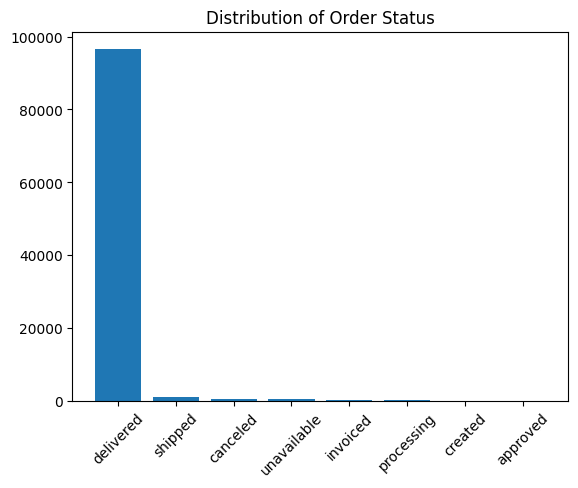

In [102]:
status_counts = orders_df["order_status"].value_counts()

plt.bar(x=status_counts.index, height=status_counts.values)
plt.title("Distribution of Order Status")
plt.xticks(rotation=45)
plt.show()

In [103]:
orders_df["order_status"].value_counts().reset_index()

,order_status,count
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


**Insight:**
- Mayoritas pesanan berstatus delivered

### Pertanyaan 2

In [104]:
orders_df[["order_id", "delivery_time"]].sample(10).reset_index()

,index,order_id,delivery_time
0,44937,3bd1df775df3958fa5a42deddb92d151,8.0
1,3485,93720f5a467d2edd5e84e209e8a9a4f6,7.0
2,74410,4134453ac6de03395610be89e3e305c2,9.0
3,21007,04b16351c3a70c83b9f8f1fe295cb450,5.0
4,73023,3dd5cc10816f5a16ed7d1c54e7d7549b,18.0
5,47027,ba69bf31fc071fd084f9967e05a7c479,22.0
6,54355,68eb0f50dff9280862d4363208528f7e,17.0
7,59685,34d0587652282a8e4f05da5083e1f276,14.0
8,83550,6c8409ca697ac1cdf422adf792fbf759,4.0
9,69103,ec9e84c39657229cb100e43cff1e533f,26.0


In [105]:
print("Waktu pengiriman rata-rata : ", orders_df.delivery_time.mean().round(2), "hari")

Waktu pengiriman rata-rata :  12.09 hari


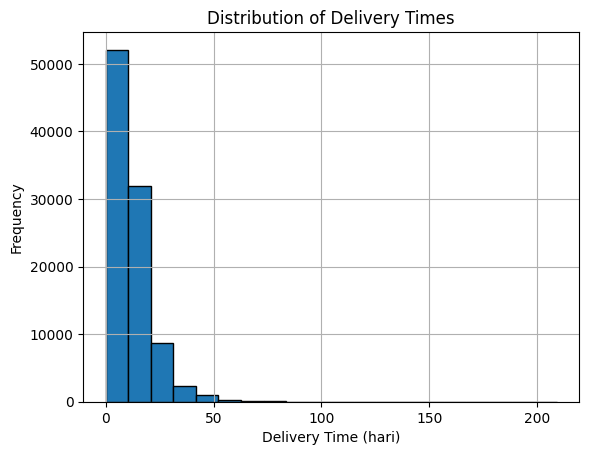

In [120]:
orders_df['delivery_time'].hist(bins=20, edgecolor='black')

plt.xlabel("Delivery Time (hari)")
plt.ylabel("Frequency")
plt.title("Distribution of Delivery Times")

plt.show()

**Insight:**
- Rata-rata waktu pengiriman adalah 12 hari yang

## Analisis Lanjutan (Opsional)

### **RFM Analysis**

In [107]:
reference_date = all_df['order_purchase_timestamp'].max()

rfm_df = all_df.groupby('customer_unique_id').agg({
    # Recency:  reference date - latest purchase
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,
    
    # Frequency: Count of unique orders by each customer
    'order_id': 'nunique',
    
    # Monetary: Sum of all purchases for each customer
    'price': 'sum'
    
}).reset_index()

rfm_df.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'price': 'Monetary'
}, inplace=True)

rfm_df.head()


,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,18.90
2,0000f46a3911fa3c0805444483337064,585,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,336,1,180.00


In [108]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,96096.000000,96096.000000,96096.000000
mean,287.735691,1.034809,147.865159
std,153.414676,0.214384,248.020347
min,0.000000,1.000000,0.000000
25%,163.000000,1.000000,47.900000
50%,268.000000,1.000000,89.900000
75%,397.000000,1.000000,159.800000
max,772.000000,17.000000,13440.000000


In [109]:
rfm_df.sort_values(by="Recency", ascending=True).head(5)

,customer_unique_id,Recency,Frequency,Monetary
50975,87ab9fec999db8bd5774917de3cdf01c,0,1,0.0
14363,262e1f1e26e92e86375f86840b4ffd63,0,2,197.5
65954,af5454198a97379394cacf676e1e96cb,13,3,178.0
37382,634420a0ea42302205032ed44ac7fccc,16,2,65.0
58524,9bb92bebd4cb7511e1a02d5e50bc4655,18,1,0.0


In [110]:
rfm_df.sort_values(by="Frequency", ascending=False).head(5)

,customer_unique_id,Recency,Frequency,Monetary
52973,8d50f5eadf50201ccdcedfb9e2ac8455,57,17,729.62
23472,3e43e6105506432c953e165fb2acf44c,231,9,1000.85
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,245,7,855.21
37797,6469f99c1f9dfae7733b25662e7f1782,111,7,664.20
76082,ca77025e7201e3b30c44b472ff346268,138,7,806.61


C:\Users\habib\AppData\Local\Temp\ipykernel_15620\3029053665.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(y="Recency", x="customer_unique_id", data=rfm_df.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0], hue="Recency")
C:\Users\habib\AppData\Local\Temp\ipykernel_15620\3029053665.py:11: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(y="Frequency", x="customer_unique_id", data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1], hue="Frequency")


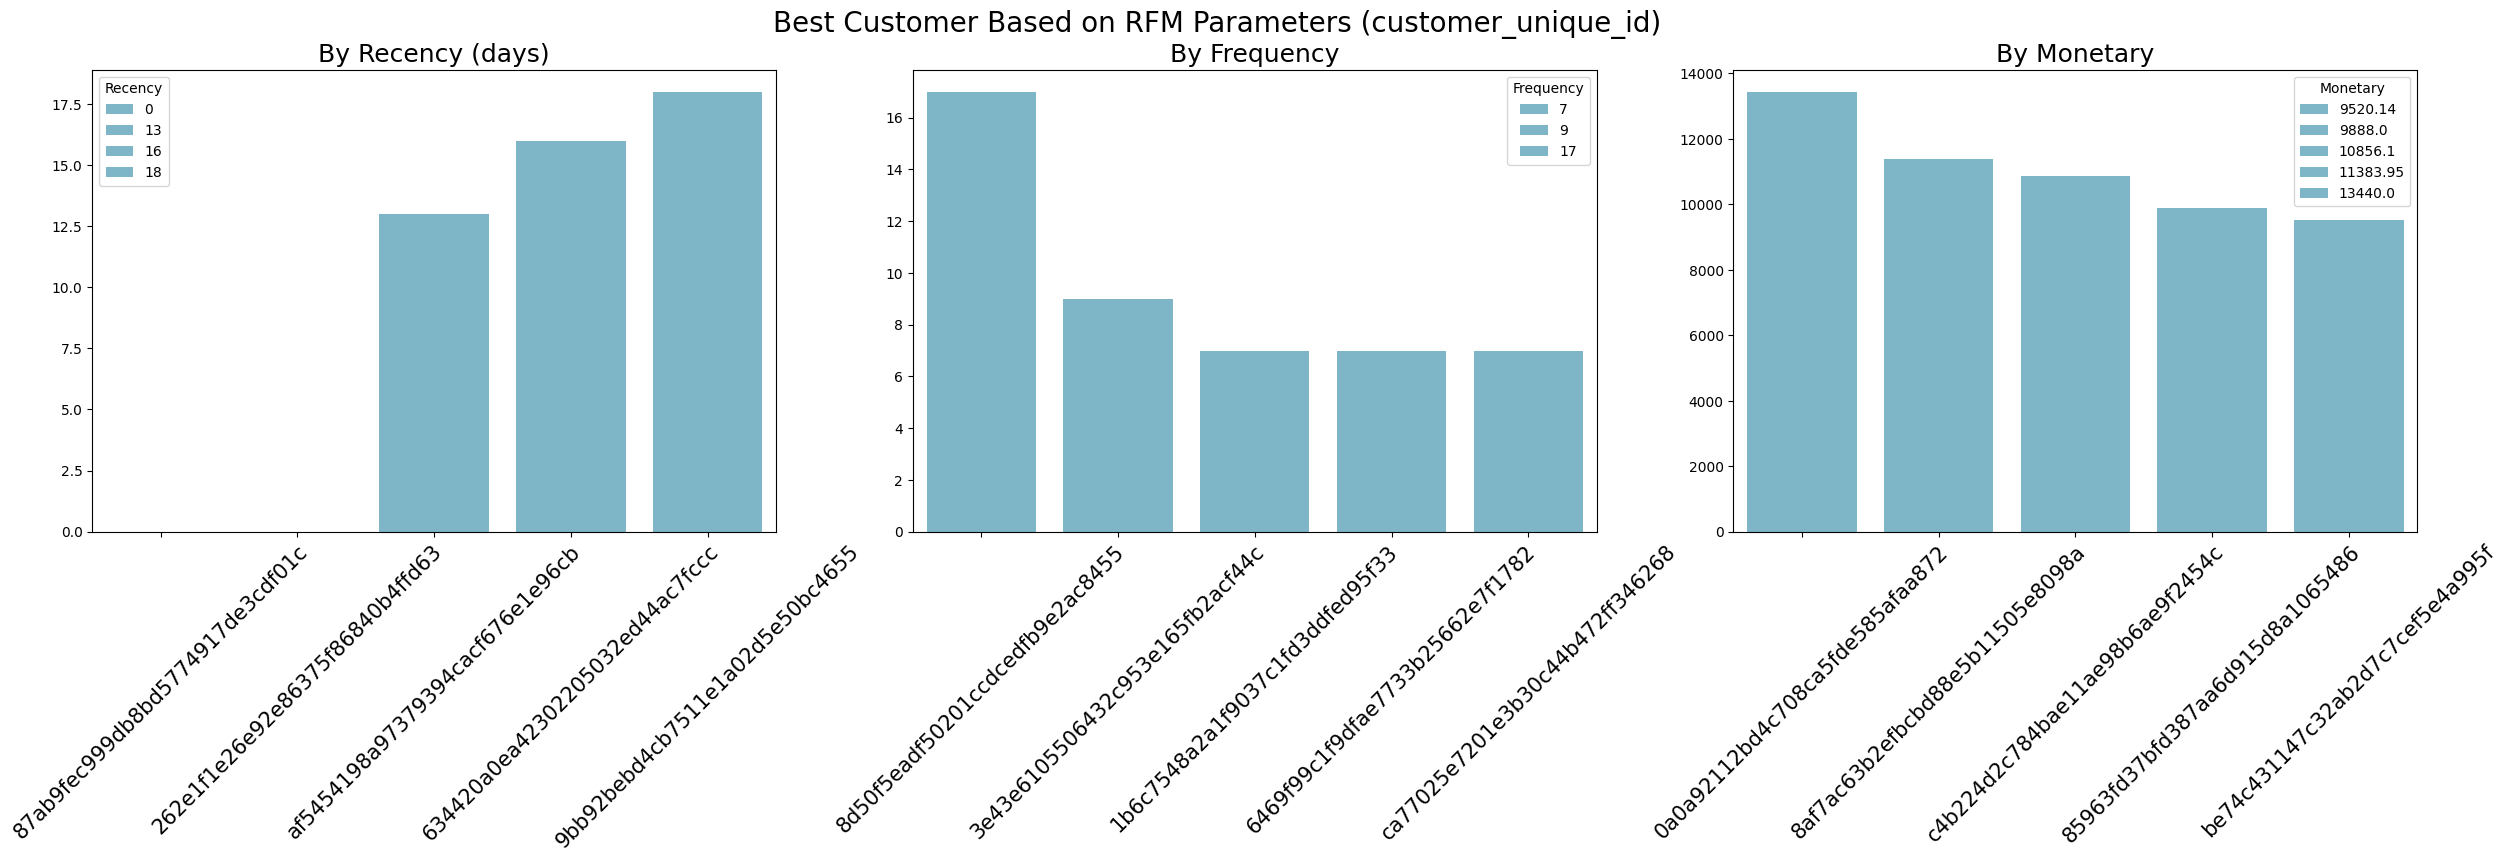

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="Recency", x="customer_unique_id", data=rfm_df.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0], hue="Recency")
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=45)

sns.barplot(y="Frequency", x="customer_unique_id", data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1], hue="Frequency")
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)

sns.barplot(y="Monetary", x="customer_unique_id", data=rfm_df.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2], hue="Monetary")
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.show()

In [112]:
rfm_df['r_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['Monetary'].rank(ascending=True)
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,r_rank,f_rank,m_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,129.90,73191.5,46550.0,64155.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,18.90,72185.5,46550.0,4727.5
2,0000f46a3911fa3c0805444483337064,585,1,69.00,3567.0,46550.0,37595.5
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99,27886.5,46550.0,10005.0
4,0004aac84e0df4da2b147fca70cf8255,336,1,180.00,32754.0,46550.0,76504.0


In [113]:

# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,r_rank_norm,f_rank_norm,m_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,129.90,76.165377,48.441142,66.761364
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,18.90,75.118502,48.441142,4.919560
2,0000f46a3911fa3c0805444483337064,585,1,69.00,3.711932,48.441142,39.122856
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99,29.019569,48.441142,10.411464
4,0004aac84e0df4da2b147fca70cf8255,336,1,180.00,34.084843,48.441142,79.612055


In [114]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_unique_id', 'RFM_score']].head(5).sort_values(by="RFM_score", ascending=False)

,customer_unique_id,RFM_score
4,0004aac84e0df4da2b147fca70cf8255,3.20
0,0000366f3b9a7992bf8c76cfdf3221e2,3.15
2,0000f46a3911fa3c0805444483337064,1.82
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.38
3,0000f6ccb0745a6a4b88665a16c9f078,1.19


#### Segmentasi customer berdasarkan RFM_score

In [115]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_unique_id', 'RFM_score', 'customer_segment']].head(20)

,customer_unique_id,RFM_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,3.15,Medium value customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.38,lost customers
2,0000f46a3911fa3c0805444483337064,1.82,Low value customers
3,0000f6ccb0745a6a4b88665a16c9f078,1.19,lost customers
4,0004aac84e0df4da2b147fca70cf8255,3.20,Medium value customer
5,0004bd2a26a76fe21f786e4fbd80607f,3.29,Medium value customer
6,00050ab1314c0e55a6ca13cf7181fecf,1.54,lost customers
7,00053a61a98854899e70ed204dd4bafe,3.79,Medium value customer
8,0005e1862207bf6ccc02e4228effd9a0,2.65,Low value customers
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2.77,Low value customers


In [116]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_unique_id.nunique()
customer_segment_df

,customer_segment,customer_unique_id
0,High value customer,2586
1,Low value customers,46443
2,Medium value customer,28214
3,Top customers,499
4,lost customers,18354


In [117]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

C:\Users\habib\AppData\Local\Temp\ipykernel_15620\3030490215.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


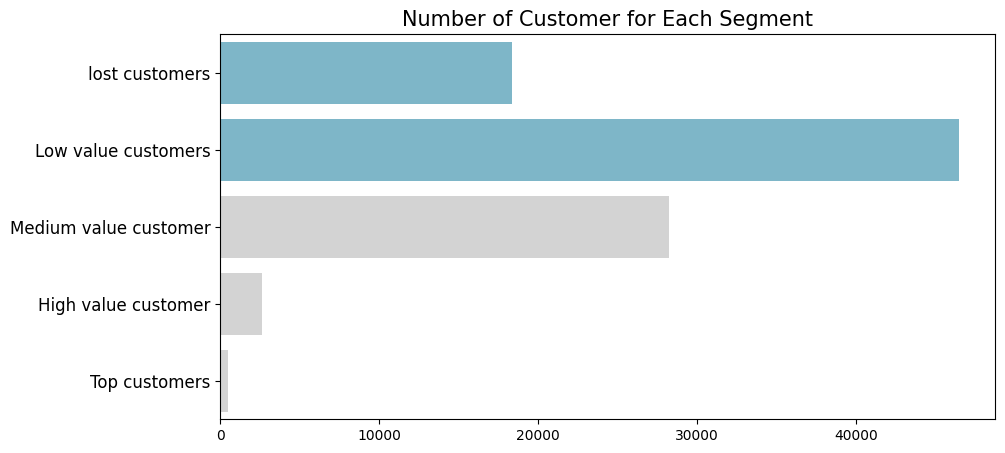

In [118]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_unique_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
1. Low Value Customers:
    - Pelanggan dengan nilai rendah merupakan mayoritas, dengan jumlah 46.446. Ini menunjukkan bahwa banyak pelanggan hanya melakukan pembelian dalam jumlah kecil atau memiliki sedikit keterlibatan dengan perusahaan.
    - Pelanggan ini mungkin hanya membeli produk satu kali atau jarang berbelanja, sehingga kontribusi mereka terhadap pendapatan perusahaan rendah. Untuk meningkatkan nilai pelanggan ini, perusahaan dapat melakukan kampanye pemasaran atau program loyalitas yang mendorong mereka untuk berbelanja lebih sering atau dalam jumlah yang lebih besar.

2. Medium Value Customer:
    - Terdapat 28.215 pelanggan dengan nilai menengah, yang menunjukkan kelompok pelanggan dengan frekuensi atau nilai pembelian yang lebih baik daripada pelanggan dengan nilai rendah.
    - Kelompok ini berpotensi untuk ditingkatkan menjadi pelanggan dengan nilai yang lebih tinggi. Perusahaan dapat menawarkan insentif atau promosi untuk mendorong mereka menjadi pelanggan bernilai tinggi atau "Top customers".

3. High Value Customer:
    - Pelanggan bernilai tinggi berjumlah 2.586, yang berarti kelompok pelanggan ini melakukan pembelian dalam jumlah lebih besar atau lebih sering dari pelanggan bernilai menengah dan rendah.
    - Kelompok ini berperan penting dalam mendukung pendapatan perusahaan. Strategi khusus, seperti program VIP atau layanan khusus, dapat diterapkan untuk mempertahankan dan meningkatkan loyalitas pelanggan dalam kelompok ini.

4. Top Customers:
    - Terdapat 499 pelanggan yang termasuk dalam kategori Top customers, yaitu pelanggan dengan kontribusi paling tinggi dalam nilai atau frekuensi pembelian.
    - Kelompok ini kemungkinan besar adalah pelanggan yang sangat loyal dan memberikan kontribusi besar terhadap pendapatan. Mengingat nilai tinggi dari pelanggan ini, penting bagi perusahaan untuk mempertahankan mereka melalui layanan pelanggan yang superior, penawaran eksklusif, atau penghargaan khusus.

5. Lost Customers:
    - Ada 18.350 pelanggan yang termasuk dalam segmen lost customers, yaitu pelanggan yang tidak lagi aktif atau belum melakukan pembelian dalam waktu lama.
    - Kehilangan pelanggan dalam jumlah ini bisa merugikan, terutama jika beberapa di antaranya dulunya merupakan pelanggan bernilai tinggi. Perusahaan dapat mencoba strategi reaktivasi, seperti kampanye email atau diskon khusus, untuk menarik kembali pelanggan yang hilang dan mendorong mereka untuk berbelanja lagi.

6. Implikasi untuk Strategi Bisnis:
    - Perusahaan dapat fokus pada mempertahankan Top customers dan High value customers dengan memberikan pengalaman belanja yang eksklusif, serta mengembangkan strategi promosi yang sesuai untuk meningkatkan keterlibatan Medium dan Low value customers.
    - Strategi untuk memenangkan kembali lost customers juga penting karena mereka memiliki potensi untuk kembali menjadi sumber pendapatan jika diaktifkan kembali dengan cara yang tepat.

## Conclusion

Conclusion:

1. Distribusi Frekuensi Pesanan Berdasarkan Status Pesanan (order_status):
    - Distribusi pesanan berdasarkan order_status menunjukkan bahwa mayoritas pesanan telah berhasil diselesaikan, dengan lebih dari 96.000 pesanan memiliki status delivered. Ini mencerminkan efisiensi yang cukup baik dalam memenuhi pesanan hingga tahap akhir pengiriman. Meskipun demikian, terdapat beberapa pesanan yang mengalami kendala, seperti yang berstatus canceled (625 pesanan) dan unavailable (609 pesanan) yang mana hal tersebut menunjukkan adanya kendala dalam pemenuhan beberapa pesanan yang bisa saja disebabkan oleh masalah stok, logistik, atau faktor lain yang perlu diperbaiki untuk meningkatkan pengalaman pelanggan.
    - Adanya pesanan dengan status shipped (1.107 pesanan) dan processing (301 pesanan) menunjukkan bahwa sebagian pesanan masih dalam proses pemenuhan dan perlu ditangani dengan cepat agar tidak tertunda lebih lama.

2. Rata-rata Waktu yang Dibutuhkan dari Pembelian hingga Pengiriman ke Pelanggan:
    - Rata-rata waktu pemenuhan pesanan, yaitu dari pembelian hingga pengiriman ke pelanggan, memberikan wawasan penting tentang efisiensi proses logistik. Berdasarkan data yang ada, rata-rata waktu pemenuhan pesanan berada dalam batas waktu yang wajar tetapi masih bisa dioptimalkan yaitu 12 hari. Informasi ini sangat berharga untuk memahami seberapa cepat perusahaan dapat memenuhi ekspektasi pelanggan dalam hal pengiriman. Jika rata-rata waktu pengiriman melebihi ekspektasi pelanggan, perusahaan mungkin perlu mempertimbangkan strategi peningkatan, seperti memperbaiki proses logistik, bekerja dengan mitra pengiriman yang lebih efisien, atau menyesuaikan estimasi waktu pengiriman yang diinformasikan kepada pelanggan.